### Part 1

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kukuroo3/body-performance-data")

print("Path to dataset files:", path)

100%|██████████| 249k/249k [00:00<00:00, 26.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/kukuroo3/body-performance-data/versions/15


In [3]:
import shutil
import pandas as pd

# Copy the file to /content/
shutil.copy('/root/.cache/kagglehub/datasets/kukuroo3/body-performance-data/versions/15/bodyPerformance.csv', '/content/bodyPerformance.csv')

df1 = pd.read_csv('bodyPerformance.csv')
df1.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Libraries


In [4]:
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

Preprocessing


In [5]:
df1 = pd.get_dummies(df1, columns=['gender'])
le = LabelEncoder()
df1['class_label'] = le.fit_transform(df1['class'])
X1 = df1.drop(columns=['class', 'class_label'])
y1 = df1['class_label']

X1_train, X1_temp, y1_train, y1_temp = train_test_split(X1, y1, test_size=0.3, stratify=y1, random_state=42)
X1_val, X1_test, y1_val, y1_test = train_test_split(X1_temp, y1_temp, test_size=0.5, stratify=y1_temp, random_state=42)

scaler = StandardScaler()
numeric_cols = ['age', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic', 'systolic', 'gripForce',
                'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']
X1_train[numeric_cols] = scaler.fit_transform(X1_train[numeric_cols])
X1_val[numeric_cols] = scaler.transform(X1_val[numeric_cols])
X1_test[numeric_cols] = scaler.transform(X1_test[numeric_cols])

y1_train_cat = to_categorical(y1_train)
y1_val_cat = to_categorical(y1_val)
y1_test_cat = to_categorical(y1_test)

build a model

In [6]:
model1 = Sequential([
    Dense(64, activation='relu', input_shape=(X1_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(4, activation='softmax')
])
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,044 (11.89 KB)

 Trainable params: 3,044 (11.89 KB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [7]:
history1 = model1.fit(X1_train, y1_train_cat, epochs=30, batch_size=32,
                      validation_data=(X1_val, y1_val_cat), verbose=1)

Epoch 1/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4597 - loss: 1.1689 - val_accuracy: 0.5983 - val_loss: 0.8893
Epoch 2/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6249 - loss: 0.8484 - val_accuracy: 0.6292 - val_loss: 0.8372
Epoch 3/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6491 - loss: 0.8031 - val_accuracy: 0.6556 - val_loss: 0.8024
Epoch 4/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6700 - loss: 0.7722 - val_accuracy: 0.6690 - val_loss: 0.7638
Epoch 5/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6819 - loss: 0.7382 - val_accuracy: 0.6834 - val_loss: 0.7398
Epoch 6/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7049 - loss: 0.6987 - val_accuracy: 0.6979 - val_loss: 0.7244
Epoch 7/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7047 - loss: 0.7046 - val_accuracy: 0.7138 - val_loss: 0.7124
Epoch 8/30
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7167 - loss: 0.6840 - val_accuracy: 0.

Evaluation of the model

In [8]:
test_loss1, test_acc1 = model1.evaluate(X1_test, y1_test_cat)
print(f"Точность на тестовой выборке: {test_acc1:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7394 - loss: 0.6113
Точность на тестовой выборке: 0.7476


**Confusion matarix**

In [9]:
from sklearn.metrics import confusion_matrix, classification_report

y1_pred = np.argmax(model1.predict(X1_test), axis=1)
print(confusion_matrix(y1_test, y1_pred))
print(classification_report(y1_test, y1_pred, target_names=le.classes_))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[442  57   3   0]
 [119 299  74  10]
 [ 46  90 351  16]
 [ 10  19  63 410]]
              precision    recall  f1-score   support

           A       0.72      0.88      0.79       502
           B       0.64      0.60      0.62       502
           C       0.71      0.70      0.71       503
           D       0.94      0.82      0.87       502

    accuracy                           0.75      2009
   macro avg       0.75      0.75      0.75      2009
weighted avg       0.75      0.75      0.75      2009



### Part 2

Upload the data

In [10]:
import pandas as pd
df2 = pd.read_csv('bank-additional-full.csv', sep=';')
df2.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Labraries

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

Preprocessing

In [12]:
# Создание целевой переменной
lb = LabelBinarizer()
df2['label'] = lb.fit_transform(df2['y'])

# Кодирование категориальных признаков
df2 = pd.get_dummies(df2.drop(columns=['y']))

X2 = df2.drop(columns=['label'])
y2 = df2['label']

# Разделение на обучающую, валидационную и тестовую выборки
X2_train, X2_temp, y2_train, y2_temp = train_test_split(X2, y2, test_size=0.3, stratify=y2, random_state=42)
X2_val, X2_test, y2_val, y2_test = train_test_split(X2_temp, y2_temp, test_size=0.5, stratify=y2_temp, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X2_train = scaler.fit_transform(X2_train)
X2_val = scaler.transform(X2_val)
X2_test = scaler.transform(X2_test)


Building the Model

In [13]:
model2 = Sequential([
    Dense(64, activation='relu', input_shape=(X2_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         4,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,209 (24.25 KB)

 Trainable params: 6,209 (24.25 KB)

 Non-trainable params: 0 (0.00 B)

Training Model

In [14]:
history2 = model2.fit(X2_train, y2_train, epochs=30, batch_size=32,
                      validation_data=(X2_val, y2_val), verbose=1)

Epoch 1/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8966 - loss: 0.2584 - val_accuracy: 0.9108 - val_loss: 0.1875
Epoch 2/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9128 - loss: 0.1826 - val_accuracy: 0.9137 - val_loss: 0.1854
Epoch 3/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9145 - loss: 0.1839 - val_accuracy: 0.9137 - val_loss: 0.1835
Epoch 4/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9204 - loss: 0.1713 - val_accuracy: 0.9153 - val_loss: 0.1812
Epoch 5/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9237 - loss: 0.1658 - val_accuracy: 0.9142 - val_loss: 0.1815
Epoch 6/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9257 - loss: 0.1623 - val_accuracy: 0.9137 - val_loss: 0.1832
Epoch 7/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9249 - loss: 0.1607 - val_accuracy: 0.9136 - val_loss: 0.1835
Epoch 8/30
901/901 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9283 - loss: 0.1539 - val_accuracy: 0.

Evaluting the Model

In [15]:
test_loss2, test_acc2 = model2.evaluate(X2_test, y2_test)
print(f"Точность на тестовой выборке: {test_acc2:.4f}")


194/194 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8957 - loss: 0.2869
Точность на тестовой выборке: 0.8948


Confusion Matrix

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y2_pred = (model2.predict(X2_test) > 0.5).astype("int32")
print(confusion_matrix(y2_test, y2_pred))
print(classification_report(y2_test, y2_pred))


194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[5142  341]
 [ 309  387]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      5483
           1       0.53      0.56      0.54       696

    accuracy                           0.89      6179
   macro avg       0.74      0.75      0.74      6179
weighted avg       0.90      0.89      0.90      6179



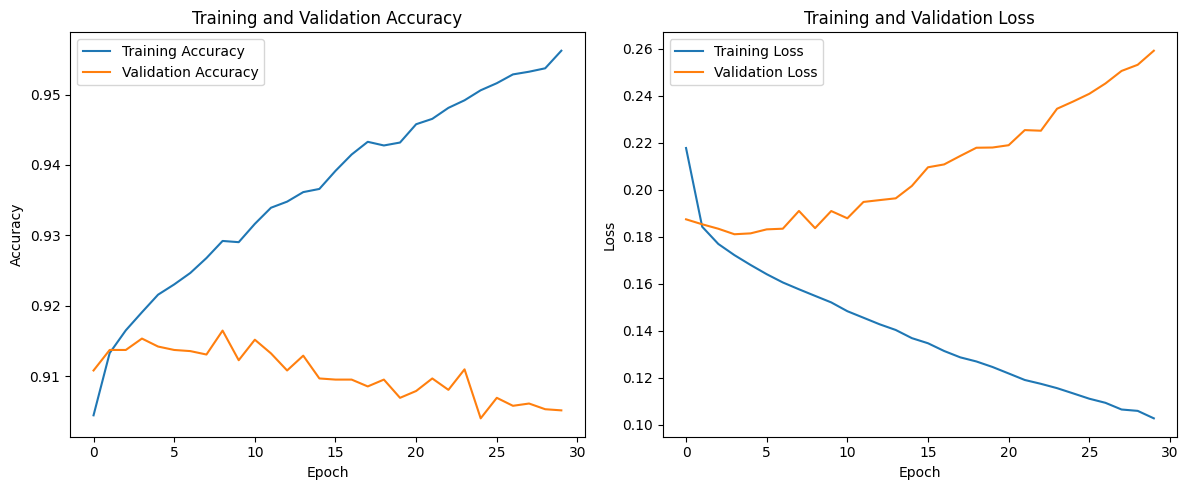

In [17]:
import matplotlib.pyplot as plt

# Построение графиков accuracy и loss
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()